In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
import tensorflow as tf
#from vgg16 import VGG16, preprocess_input
#from vgg19 import VGG19, preprocess_input
#from tensorflow.contrib.keras.python.keras.applications.xception import Xception, preprocess_input 
#from resnet50 import ResNet50, preprocess_input
#from inception_v3 import InceptionV3, preprocess_input
from xception import Xception, preprocess_input
from tensorflow.contrib.keras.python.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from tensorflow.contrib.keras.python.keras.models import Model
from tensorflow.contrib.keras.python.keras.models import model_from_json
from tensorflow.contrib.keras.python.keras.layers import Dense, Input, BatchNormalization, Activation, Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
import _pickle as cPickle

# other imports
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import sys

import time

In [2]:
# config variables
model_name = 'xception'
weights = 'imagenet'
include_top = 0
train_path = 'jpg'
features_path = 'output/flowers_17/xception/features.h5'
labels_path = 'output/flowers_17/xception/labels.h5'
test_size = 0.1
results = 'output/flowers_17/xception/results.txt'
classfier_file = 'output/flowers_17/xception/classifier.cpickle'

In [3]:
# path to training dataset
train_labels = sorted(os.listdir(train_path))

In [4]:
# variables to hold features and labels
features = []
labels   = []

In [5]:
label = 0
i = 0
j = 80

In [6]:
for x in range(1, 18):
    for y in range(0, 80):
        labels.append(label)
    label += 1

In [8]:
# label 17
# enchinacea
# train 68 test 17

enchinacea_imgfiles = sorted(glob.glob('flower/Enchinacea/*.jpg'))
for _ in range(len(enchinacea_imgfiles)):
    labels.append(17)

In [10]:
# label 18
# Frangipani
# train 133 test 33

frangipani_imgfiles = sorted(glob.glob('flower/Frangipani/*.jpg'))
for _ in range(len(frangipani_imgfiles)):
    labels.append(18)

In [11]:
# label 19
# Ipomoea_pandurata
# train 86 test 21

ipomoea_pandurata_imgfiles = sorted(glob.glob('flower/Ipomoea_pandurata/*.jpg'))
for _ in range(len(ipomoea_pandurata_imgfiles)):
    labels.append(19)

In [12]:
# label 20
# mugunghwa
# train 66 test 16

mugunghwa_imgfiles = sorted(glob.glob('flower/mugunghwa/*.jpg'))
for _ in range(len(mugunghwa_imgfiles)):
    labels.append(20)

In [13]:
# label 21
# Nymphaea_odorata
# train 155 test 39

nymphaea_odorata_imgfiles = sorted(glob.glob('flower/Nymphaea_odorata/*.jpg'))
for _ in range(len(nymphaea_odorata_imgfiles)):
    labels.append(21)

In [15]:
from tensorflow.contrib.keras.python.keras.models import Sequential

In [16]:
# create the pretrained models 
# check for pretrained weight usage or not
# check for top layers to be included or not
if model_name == "vgg16":
	base_model = VGG16(weights=weights)
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
	image_size = (224, 224)
elif model_name == "vgg19":
	base_model = VGG19(weights=weights)
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
	image_size = (224, 224)
elif model_name == "resnet50":
	base_model = ResNet50(weights=weights)
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
	image_size = (224, 224)
elif model_name == "inceptionv3":
	base_model = InceptionV3(weights=weights)
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('mixed9').output)
	image_size = (299, 299)
elif model_name == "xception":
	base_model = Xception(weights=weights)
	model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
	image_size = (299, 299)
else:
	base_model = None

In [17]:
# loop over all the labels in the folder
for label in train_labels:
    cur_path = train_path + "/" + label
    for image_path in glob.glob(cur_path):
        img = image.load_img(image_path, target_size=image_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        print(label + " complete")
        sys.stdout.flush()
        feature = model.predict(x)
        flat = feature.flatten()
        features.append(flat)

image_0001.jpg complete
image_0002.jpg complete
image_0003.jpg complete
image_0004.jpg complete
image_0005.jpg complete
image_0006.jpg complete
image_0007.jpg complete
image_0008.jpg complete
image_0009.jpg complete
image_0010.jpg complete
image_0011.jpg complete
image_0012.jpg complete
image_0013.jpg complete
image_0014.jpg complete
image_0015.jpg complete
image_0016.jpg complete
image_0017.jpg complete
image_0018.jpg complete
image_0019.jpg complete
image_0020.jpg complete
image_0021.jpg complete
image_0022.jpg complete
image_0023.jpg complete
image_0024.jpg complete
image_0025.jpg complete
image_0026.jpg complete
image_0027.jpg complete
image_0028.jpg complete
image_0029.jpg complete
image_0030.jpg complete
image_0031.jpg complete
image_0032.jpg complete
image_0033.jpg complete
image_0034.jpg complete
image_0035.jpg complete
image_0036.jpg complete
image_0037.jpg complete
image_0038.jpg complete
image_0039.jpg complete
image_0040.jpg complete
image_0041.jpg complete
image_0042.jpg c

In [18]:
len(features)

1360

In [19]:
for img_file in enchinacea_imgfiles:
    img = image.load_img(img_file, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(img_file + " complete")
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)

flower/Enchinacea/image_03828.jpg complete
flower/Enchinacea/image_03829.jpg complete
flower/Enchinacea/image_03830.jpg complete
flower/Enchinacea/image_03831.jpg complete
flower/Enchinacea/image_03832.jpg complete
flower/Enchinacea/image_03833.jpg complete
flower/Enchinacea/image_03834.jpg complete
flower/Enchinacea/image_03835.jpg complete
flower/Enchinacea/image_03836.jpg complete
flower/Enchinacea/image_03837.jpg complete
flower/Enchinacea/image_03838.jpg complete
flower/Enchinacea/image_03839.jpg complete
flower/Enchinacea/image_03840.jpg complete
flower/Enchinacea/image_03841.jpg complete
flower/Enchinacea/image_03842.jpg complete
flower/Enchinacea/image_03843.jpg complete
flower/Enchinacea/image_03844.jpg complete
flower/Enchinacea/image_03845.jpg complete
flower/Enchinacea/image_03846.jpg complete
flower/Enchinacea/image_03847.jpg complete
flower/Enchinacea/image_03848.jpg complete
flower/Enchinacea/image_03849.jpg complete
flower/Enchinacea/image_03850.jpg complete
flower/Ench

In [20]:
for img_file in frangipani_imgfiles:
    img = image.load_img(img_file, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(img_file + " complete")
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)

flower/Frangipani/image_00781.jpg complete
flower/Frangipani/image_00782.jpg complete
flower/Frangipani/image_00783.jpg complete
flower/Frangipani/image_00784.jpg complete
flower/Frangipani/image_00785.jpg complete
flower/Frangipani/image_00786.jpg complete
flower/Frangipani/image_00787.jpg complete
flower/Frangipani/image_00788.jpg complete
flower/Frangipani/image_00789.jpg complete
flower/Frangipani/image_00790.jpg complete
flower/Frangipani/image_00791.jpg complete
flower/Frangipani/image_00792.jpg complete
flower/Frangipani/image_00793.jpg complete
flower/Frangipani/image_00794.jpg complete
flower/Frangipani/image_00795.jpg complete
flower/Frangipani/image_00796.jpg complete
flower/Frangipani/image_00797.jpg complete
flower/Frangipani/image_00798.jpg complete
flower/Frangipani/image_00799.jpg complete
flower/Frangipani/image_00800.jpg complete
flower/Frangipani/image_00801.jpg complete
flower/Frangipani/image_00802.jpg complete
flower/Frangipani/image_00803.jpg complete
flower/Fran

In [21]:
for img_file in ipomoea_pandurata_imgfiles:
    img = image.load_img(img_file, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(img_file + " complete")
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)

flower/Ipomoea_pandurata/image_02446.jpg complete
flower/Ipomoea_pandurata/image_02447.jpg complete
flower/Ipomoea_pandurata/image_02448.jpg complete
flower/Ipomoea_pandurata/image_02449.jpg complete
flower/Ipomoea_pandurata/image_02450.jpg complete
flower/Ipomoea_pandurata/image_02451.jpg complete
flower/Ipomoea_pandurata/image_02452.jpg complete
flower/Ipomoea_pandurata/image_02453.jpg complete
flower/Ipomoea_pandurata/image_02454.jpg complete
flower/Ipomoea_pandurata/image_02455.jpg complete
flower/Ipomoea_pandurata/image_02456.jpg complete
flower/Ipomoea_pandurata/image_02457.jpg complete
flower/Ipomoea_pandurata/image_02458.jpg complete
flower/Ipomoea_pandurata/image_02459.jpg complete
flower/Ipomoea_pandurata/image_02460.jpg complete
flower/Ipomoea_pandurata/image_02461.jpg complete
flower/Ipomoea_pandurata/image_02462.jpg complete
flower/Ipomoea_pandurata/image_02463.jpg complete
flower/Ipomoea_pandurata/image_02464.jpg complete
flower/Ipomoea_pandurata/image_02465.jpg complete


In [22]:
for img_file in mugunghwa_imgfiles:
    img = image.load_img(img_file, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(img_file + " complete")
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)

flower/mugunghwa/mugunghwa_img (1).jpg complete
flower/mugunghwa/mugunghwa_img (10).jpg complete
flower/mugunghwa/mugunghwa_img (11).jpg complete
flower/mugunghwa/mugunghwa_img (12).jpg complete
flower/mugunghwa/mugunghwa_img (13).jpg complete
flower/mugunghwa/mugunghwa_img (14).jpg complete
flower/mugunghwa/mugunghwa_img (15).jpg complete
flower/mugunghwa/mugunghwa_img (16).jpg complete
flower/mugunghwa/mugunghwa_img (17).jpg complete
flower/mugunghwa/mugunghwa_img (18).jpg complete
flower/mugunghwa/mugunghwa_img (19).jpg complete
flower/mugunghwa/mugunghwa_img (2).jpg complete
flower/mugunghwa/mugunghwa_img (20).jpg complete
flower/mugunghwa/mugunghwa_img (21).jpg complete
flower/mugunghwa/mugunghwa_img (22).jpg complete
flower/mugunghwa/mugunghwa_img (23).jpg complete
flower/mugunghwa/mugunghwa_img (24).jpg complete
flower/mugunghwa/mugunghwa_img (25).jpg complete
flower/mugunghwa/mugunghwa_img (26).jpg complete
flower/mugunghwa/mugunghwa_img (27).jpg complete
flower/mugunghwa/mugun

In [23]:
for img_file in nymphaea_odorata_imgfiles:
    img = image.load_img(img_file, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(img_file + " complete")
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)

flower/Nymphaea_odorata/image_00252.jpg complete
flower/Nymphaea_odorata/image_00253.jpg complete
flower/Nymphaea_odorata/image_00254.jpg complete
flower/Nymphaea_odorata/image_00255.jpg complete
flower/Nymphaea_odorata/image_00256.jpg complete
flower/Nymphaea_odorata/image_00257.jpg complete
flower/Nymphaea_odorata/image_00258.jpg complete
flower/Nymphaea_odorata/image_00259.jpg complete
flower/Nymphaea_odorata/image_00260.jpg complete
flower/Nymphaea_odorata/image_00261.jpg complete
flower/Nymphaea_odorata/image_00262.jpg complete
flower/Nymphaea_odorata/image_00263.jpg complete
flower/Nymphaea_odorata/image_00264.jpg complete
flower/Nymphaea_odorata/image_00265.jpg complete
flower/Nymphaea_odorata/image_00266.jpg complete
flower/Nymphaea_odorata/image_00267.jpg complete
flower/Nymphaea_odorata/image_00268.jpg complete
flower/Nymphaea_odorata/image_00269.jpg complete
flower/Nymphaea_odorata/image_00270.jpg complete
flower/Nymphaea_odorata/image_00271.jpg complete
flower/Nymphaea_odor

In [24]:
print(len(labels))
print(len(features))

1994
1994


In [25]:
# encode the labels using LabelEncoder
targetNames = np.unique(labels)
le = LabelEncoder()
le_labels = le.fit_transform(labels)

In [26]:
print(labels[0])
print(le_labels[0])

0
0


In [27]:
# save features and labels 
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

<HDF5 dataset "dataset_1": shape (1994, 4096), type "<f4">

In [28]:
h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

<HDF5 dataset "dataset_1": shape (1994,), type "<i8">

In [29]:
h5f_data.close()
h5f_label.close()

In [3]:
# data load 부분

h5f_data = h5py.File('output/flowers_17/xception/features.h5', 'r')
h5f_label = h5py.File('output/flowers_17/xception/labels.h5', 'r')

# In[5]:

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']


# In[6]:

features = np.array(features_string)
labels   = np.array(labels_string)

del features_string
del labels_string

In [4]:
# 학습 & 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=9)

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 2048)
(599, 2048)
(1395,)
(599,)


In [7]:
y_test[0]

21

In [8]:
from tensorflow.contrib.keras.python.keras import layers

In [9]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [10]:
# 모델 생성

model = LogisticRegression(random_state=9)

In [11]:
# 학습 시작

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print(len(y_train))
print(np.amax(y_train))
print(np.amin(y_train))

1395
21
0


In [13]:
# use rank-1 and rank-5 predictions
f = open(results, "w")
rank_1 = 0
rank_5 = 0

In [14]:
# loop over test data
for (label, feature) in zip(y_test, x_test):
    # predict the probability of each class label and 
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(feature))[0]
    predictions = np.argsort(predictions)[::-1][:5]
    
    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1
        
    # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1


In [15]:
# convert accuracies to percentages
rank_1 = (rank_1 / float(len(y_test))) * 100
rank_5 = (rank_5 / float(len(y_test))) * 100

In [16]:
# write the accuracies to file
f.write("rank-1: {:.2f}%\n".format(rank_1))
f.write("rank-5: {:.2f}%\n\n".format(rank_5))

16

In [17]:
# evaluate the model of test data
preds = model.predict(x_test)

In [18]:
# write the classification report to file
f.write("{}\n".format(classification_report(y_test, preds)))
f.close()

In [19]:
import pickle

In [20]:
# dump classifier to file
with open(classfier_file, "wb") as f:
    pickle.dump(model, f)

In [32]:
class_names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
			   "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
			   "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
			   "windflower", "pansy", "Enchinacea", "Frangipani", "Ipomoea_pandurata", "mugunghwa", "Nymphaea_odorata"]

In [21]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

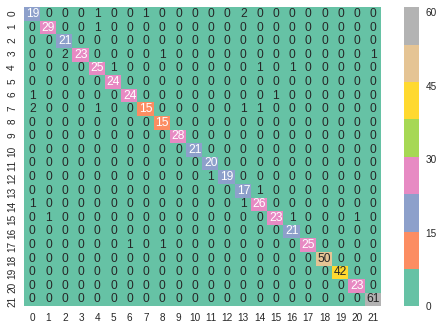

In [22]:
# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, 
            annot=True,
            cmap="Set2")
plt.show()

In [23]:
import glob
from scipy.ndimage import imread

In [45]:
image_files = sorted(glob.glob('jpg/*.jpg'))

In [ ]:
i = 339
print(data_splits['tst1'][0][i])c
img_array = imread(image_files[data_splits['tst1'][0][i]])
pred = model.predict(testData[i])
print(pred)
plt.imshow(img_array)
plt.show()
print("예측 : ", class_names[pred[0]], ", 정답 : " , class_names[testLabels[i]])